# Introduction
The goal of this project is to produce a neural network capable of a basic level of image classification. The network will be limited to certain tools, specifically dense and dropout layers and will be tasked with the classification of the cifar100 dataset. This dataset consists of 100 different classes of images making it a good challenge for a neural network to undertake.


#### Dataset Information
The dataset will be the cifar100 dataset from tensorflow. This is a multi-class single label classification problem. There are 100 different types of images in this dataset to be classified. This is a balanced dataset with each class having 600 images. The data comes pre-split with 500 images for training and 100 images for testing. There are 60,000 images in total and each image is a 32x32 color image.
 
[Dataset Link](‘https://www.tensorflow.org/datasets/catalog/cifar100’)


#### Evaluation
To determine the appropriate evaluation measure it is important to take into account information about the dataset. It is important to know whether it is balanced or imbalanced and whether or not each classification carries equal weighting in importance. In this case the dataset is balanced and each classification label is equally important. This type of problem lends itself to evaluation using either accuracy or area under the receiver operating characteristic curve. This evaluation will focus on accuracy because of its ease in use and interpretation. It is an easy evaluation metric to implement and compare and also an easier metric to understand for someone unfamiliar with statistics and data science than the AOC-ROC curve metric. If this report was being used with real stakeholders accuracy would be better understood. 

To determine what an appropriate successful accuracy would be for the network it is useful to look at the number of classes in the dataset and the amount. If one was to try and blindly guess and choose all one class this would lead to an accuracy of 1% because there are 100 different classes. There are an equal number of classes so there is no majority label to guess to improve random guessing. A model that is able to produce a classification accuracy significantly better than 1% would be a good place to start and build off of. 

The model will be evaluated using a holdout test set of 10,000 images consisting of 100 of each class. The training set will consist of 500 images of each class for a total of 50,000 images. Training will be done on 80% of the training data with 20% held for validation. This means that 400 of each image will be used for training, 100 for validation, and 100 for testing from the test set.



In [1]:
from tensorflow.keras.datasets import cifar100


In [18]:
import keras 
from keras.callbacks import CSVLogger
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt


## Model Development

### Examine the data
The data consists of images that are 32x32.  There are 50,000 training images and 10,000 test images. The labels are integers ranging from 0 to 99 representing each class of image. 

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [4]:
print('tensor shape')
print('\ttraining images:', train_images.shape)
print('\ttraining labels:', train_labels.shape)
print('\ttraining images:', train_images.dtype)
print('\ttraining labels:', train_labels.dtype)
print('\ttest images:', test_images.shape)
print('\ttest labels:', test_labels.shape)

tensor shape
	training images: (50000, 32, 32, 3)
	training labels: (50000, 1)
	training images: uint8
	training labels: int64
	test images: (10000, 32, 32, 3)
	test labels: (10000, 1)


#### Example Data

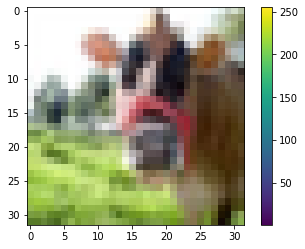

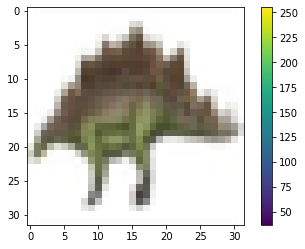

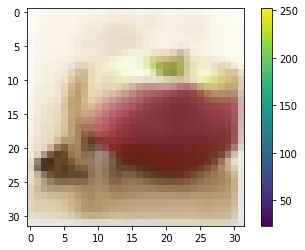

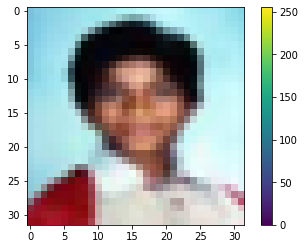

In [5]:
for i,image in enumerate(train_images[:4]):
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

#### Example Labels

In [7]:
train_labels[0:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

## Preprocess Data

In order to use the images in a neural network with a dense layer they will first have to be converted into flat vectors. Using the reshape function the 32x32x3 images will be flattened into a single vector of length 3072. The vectors will then be cast to a float and normalized by rescaling from 0 to 1. The labels for the data will be transformed using one-hot encoding where each label is a vector of length 100 with a 1 representing the correct label. 

#### Preprocess images

In [8]:
train_images_flat = train_images.reshape((50000, 32*32*3)).astype('float32') / 255.
test_images_flat = test_images.reshape((10000, 32*32*3)).astype('float32') / 255.


#### Preprocess Labels


In [9]:
from tensorflow.keras.utils import to_categorical

orig_label = train_labels[0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [10]:
print('\'', orig_label, '\'', 'as one-hot vector:\n', train_labels[0], sep='')

'[19]'as one-hot vector:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Baseline Model
To determine whether our final tuned model is effective, a baseline model needs to be established showing at minimum statistical power to correctly classify the images. As previously noted, this is a balanced dataset with 100 possible classes meaning that a random guess has a 1% chance of being right. So to begin any model that is able to predict the image class greater than 1% would be an improvement on random chance. The baseline will be a small network starting with 1 input layer with a small amount of units and the appropriate output layer. This will establish the neural network baseline model for this report.

### Model Description
This is a multiclass single label classification problem with one-hot encoded labels so the appropriate loss function is categorical cross entropy. The evaluation metric will be classification accuracy which is appropriate for a balanced data multi-class classification problem. The base model will use the rmsprop optimizer but the adam optimizer will also be explored. The base model will use a single dense input layer with 128 units with activation relu and a dense output layer with 100 units, one for each class, and a softmax activation. This final layer will output the probabilities of each class and our final prediction class for each image based on the probabilities calculated. The base model will be trained for 5 epochs, a relatively small training time. Every model will end with the same 100 units softmax layer to get our predictions. Models that refer to 1,2 or 3 layers are referring to the first 1,2 or 3 layers of the model with the addition of the last output softmax layer. The scope of the project will limit the types of layers to sequential dense and dropout. The number of layers, number of units, learning rates and the number of epochs to train for will all be examined and tuned to produce the best model possible with these limitations.



In [ ]:
network = models.Sequential()

# add 2 layers
network.add(layers.Dense(128, activation='relu', input_shape=(32 * 32 * 3, )))
network.add(layers.Dense(100, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

base_model_hist = network.fit(train_images_flat, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 11s 8ms/step - loss: 4.4616 - accuracy: 0.0216 - val_loss: 4.2968 - val_accuracy: 0.0388
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.1743 - accuracy: 0.0547 - val_loss: 4.1497 - val_accuracy: 0.0567
Epoch 3/5
1250/1250 [==============================] - 11s 9ms/step - loss: 4.0807 - accuracy: 0.0680 - val_loss: 4.0580 - val_accuracy: 0.0720
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 4.0370 - accuracy: 0.0776 - val_loss: 4.0471 - val_accuracy: 0.0809
Epoch 5/5
1250/1250 [==============================] - 9s 8ms/step - loss: 4.0138 - accuracy: 0.0832 - val_loss: 4.0028 - val_accuracy: 0.0890


#### Plot Training and Validation Loss and Accuracy Graphs

In [36]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

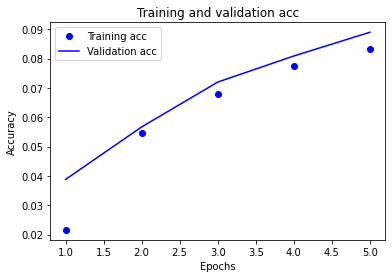

Base Model Validation Accuracy:  8.9 %


In [ ]:
plot_train_val_acc(base_model_hist)
print('Base Model Validation Accuracy: ', round(base_model_hist.history['val_accuracy'][-1]*100,5),'%')

The base model with 1 dense layer of 128 units was able to achieve a validation accuracy of 8.9% after training for 5 epochs. This is significantly better than a random guess which would lead to 1% accuracy. This will work as a good neural network base model on which to try and improve and gain better results by going more in depth. 

### Develop a model that overfits
A base neural network with statistical power has been achieved. The next step is to develop a network that overfits the data. The goal is to train a neural network model that will have very high training accuracy and find the point where validation accuracy begins to drop off. From this point we can start to work backwards to determine where the optimal model to predict unseen data may lie. In order to increase the capacity of the model to overfit we need to increase the model's size. This can be achieved by increasing the amount of layers, the number of units in a layer, and training for more epochs. When training models to overfit the data, both the training and validation accuracy and loss will be monitored and plotted. This will aid in determining when overfitting begins to occur in the network's training epochs. Once the validation values begin to degrade, accuracy decreases and loss increases, we have achieved overfitting. From there we can dial the model back to the most accurate size.

#### Neural Network Model Training Functions

In [12]:
# Build network using rmsprop optimizer

def build_network_rmsprop_opt(units_list, learning_rate=0.01, epochs=5, log_name='log'):
    network = models.Sequential()
    
    #first layer - needs input_shape
    network.add(layers.Dense(units_list[0], activation='relu', input_shape=(32 * 32 * 3, )))
    
    #middle layers
    for units in units_list[1:]:
        network.add(layers.Dense(units, activation='relu'))
    
    #last layer
    network.add(layers.Dense(100, activation='softmax'))
    
    
    network.compile(optimizer=keras.optimizers.RMSprop(learning_rate),
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    log_name = log_name + '.csv'
    csv_logger = CSVLogger(log_name, append=False, separator=',')
    history = network.fit(
        train_images_flat, train_labels, 
        epochs=epochs, 
        verbose=0,
        callbacks=[csv_logger],
        validation_split=0.2
    )

    return history

In [13]:
# Build network using Adam optimizer

def build_network_adam_opt(units_list, learning_rate=0.01, epochs=5, log_name='log'):
    network = models.Sequential()
    
    #first layer - needs input_shape
    network.add(layers.Dense(units_list[0], activation='relu', input_shape=(32 * 32 * 3, )))
    
    #middle layers
    for units in units_list[1:]:
        network.add(layers.Dense(units, activation='relu'))
    
    #last layer
    network.add(layers.Dense(100, activation='softmax'))
    
    
    network.compile(optimizer=keras.optimizers.Adam(learning_rate),
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    log_name = log_name + '.csv'
    csv_logger = CSVLogger(log_name, append=True, separator=',')
    history = network.fit(
        train_images_flat, train_labels, 
        epochs=epochs, 
        verbose=0,
        callbacks=[csv_logger],
        validation_split=0.2
    )

    return history

In [14]:
# Build network with optimizer as parameter

def build_network(units_list, epochs=15, log_name='log', optimizer='rmsprop'):
    network = models.Sequential()
    
    #first layer - needs input_shape
    network.add(layers.Dense(units_list[0], activation='relu', input_shape=(32 * 32 * 3, )))
    
    #middle layers
    for units in units_list[1:]:
        network.add(layers.Dense(units, activation='relu'))
    
    #last layer
    network.add(layers.Dense(100, activation='softmax'))
    
    
    network.compile(optimizer=optimizer,
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    log_name = log_name + '.csv'
    csv_logger = CSVLogger(log_name, append=True, separator=',')
    history = network.fit(
        train_images_flat, train_labels, 
        epochs=epochs, 
        verbose=0,
        callbacks=[csv_logger],
        validation_split=0.2
    )

    return history

#### Training and Validation Accuracy and Loss Plot Comparisions  


In [44]:
def compare_loss(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['loss']), len(hist2.history['loss']))
    loss = hist1.history['loss'][:min_epochs]
    val_loss = hist1.history['val_loss'][:min_epochs]
    loss_drop = hist2.history['loss']
    val_loss_drop = hist2.history['val_loss']

    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, loss, blue_dots, label = f'{title1} Training Loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = f'{title1} Validation Loss')
    plt.plot(epochs, loss_drop, red_dots, label = f'{title2} Training Loss')
    plt.plot(epochs, val_loss_drop, solid_red_line, label = f'{title2} Validation Loss')
    # plt.title('Loss With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def compare_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['accuracy']), len(hist2.history['accuracy']))
    acc = hist1.history['accuracy'][:min_epochs]
    val_acc = hist1.history['val_accuracy'][:min_epochs]
    acc_drop = hist2.history['accuracy']
    val_acc_drop = hist2.history['val_accuracy']

    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, acc, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, acc_drop, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_drop, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


### Initial Model Exploration
Start with some initial paramaters and layers to determine where to start tuning the model for optimal accuracy. 

#### 1 Layer Network with 512 Units and 15 Epochs  

This model begins to overfit at about 7 epochs with a peak validation accuracy of close to 14%. The loss plot shows that validation loss begins to increase after 7 epochs as well. 

In [ ]:
init_1_layer_history = build_network([512], 15)

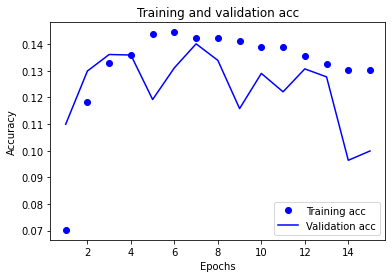

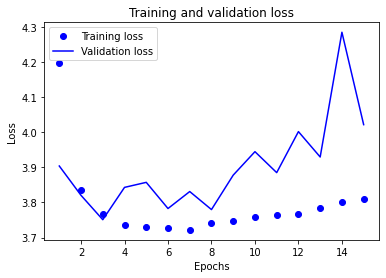

In [ ]:
plot_train_val_acc(init_1_layer_history)
plot_train_val_loss(init_1_layer_history)

#### 2 Layer Network with 512 Units Each and 15 Epochs
This model shows overfitting after 6 epochs where validation accuracy begins to decrease and validation loss begins increasing. When comparing the 2 layer model to the 1 layer model, the validation accuracy is higher for the 2 layer model and the loss is lower leading. The one layer model peaked around 14% validation accuracy while the 2 layer model was above 18%. A 2 layer model is likely a better fit for this data.

In [ ]:
init_2_layer_history = build_network([512, 512], 15)

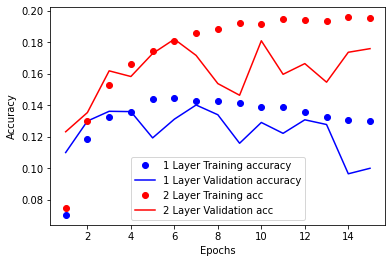

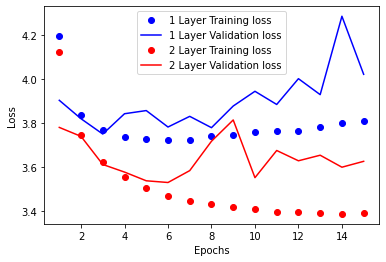

In [ ]:
compare_acc(init_1_layer_history, init_2_layer_history, '1 Layer', '2 Layer')
compare_loss(init_1_layer_history, init_2_layer_history, '1 Layer', '2 Layer')

#### Optimizer Comparison: RMSProp vs Adam

When comparing identical 2 layer networks with a RMSProp optimizer vs an Adam optimizer the results show that the Adam optimizer has better results. Validation accuracy was increased from 18% to 20%. The Adam optimizer will be used going forward for future model networks. 

In [ ]:
init_2_layer_adam_history = build_network([512, 512], 15, optimizer='adam')

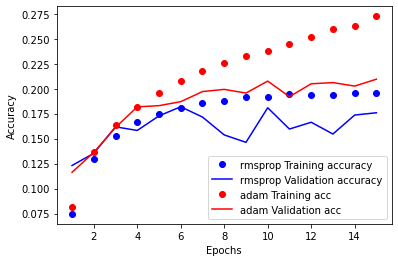

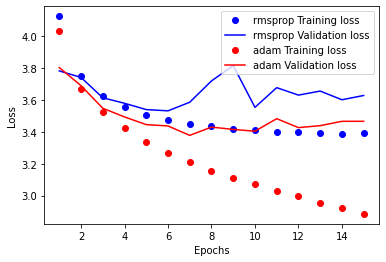

In [ ]:
compare_acc(init_2_layer_history, init_2_layer_adam_history, 'rmsprop', 'adam')
compare_loss(init_2_layer_history, init_2_layer_adam_history, 'rmsprop', 'adam')

#### 3 Layer 512 Units Network with Adam Optimizer for 15 Epochs
When comparing the 3 layer network to the 2 layer network the plots for validation accuaracy and loss are very similar with no clear better model. It will be worthwhile to include both a 2 layer network and 3 layer network when tuning. The only noticable difference is that the 3 layer training accuracy and loss continue to improve at a faster rate than the 2 layer network meaning that it is able to overfit the data quicker than the 2 layer model. Both model's validation accuracy begins to plateau around 7 to 8 epochs. 

In [ ]:
init_3_layer_history_adam = build_network([512, 512, 512], 15, optimizer='adam')


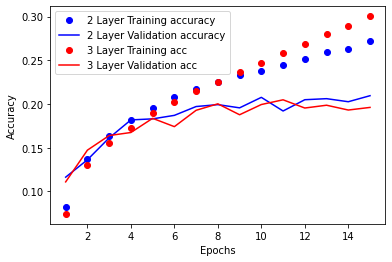

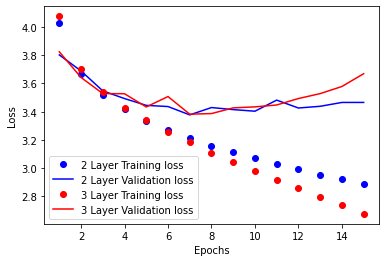

In [ ]:
compare_acc(init_2_layer_adam_history, init_3_layer_history_adam, '2 Layer', '3 Layer')
compare_loss(init_2_layer_adam_history, init_3_layer_history_adam, '2 Layer', '3 Layer')

## Hyperparamater Tuning
From preliminary findings it has been determined that the best model is likely 2 or 3 layers plus a final output layer. The best optimizer is the Adam optimizer and the model may begin to start overfitting after 7 or 8 epochs. The parameters to tune for this report will be the number of layers, the units per layer and the learning rate of the gradient descent optimizer. From preliminary modeling there was an obvious benefit to 2 layers over 1 however the benefit between 2 or 3 was less clear. The parameter tuning will examine 2 and 3 dense layers with a final dense output layer. The number of units will also be varied between 3 options for each layer, 128, 512, and 1024, to determine the best option for each layer for the model. Finally the learning rate will also be varied around the default of 0.001. 
 
A grid search technique will be implemented and all of the validation accuracies recorded for each network trained on each parameter combination. The combination of number of layers, units in each layer and learning rate that produces the highest validation accuracy will be the final model chosen. These parameters will be used for the final model that will be trained using both the training and validation data before being used for the test sample dataset. There are 27 combinations of a 2 layer model and 81 combinations of parameters when looking at a 3 layer model for a total search space of 108 networks.


**Layers**  
2,3  

**Units**  
128, 512, 1024  

**Learning Rate**  
0.0001, 0.001, 0.01

In [ ]:
unit_space = [128, 512, 1024]
learning_rate_space = [0.0001, 0.001, 0.01]
layer_space = [2,3]


In [ ]:
def get_search_grid(unit_space, learning_rate_space, layer_space):
    search_space = []
    for units1 in unit_space:
        for units2 in unit_space:
            for lr in learning_rate_space:
                search_space.append([[units1, units2],lr])
    space2_len = len(search_space)
    print('Search layer 2 length: ', space2_len)
    for u1 in unit_space:
        for u2 in unit_space:
            for u3 in unit_space:
                for lr in learning_rate_space:
                    search_space.append([[u1, u2, u3], lr])
    space3_len = len(search_space) - space2_len
    print('Search layer 3 length: ', space3_len)
    return search_space

search_space = get_search_grid(unit_space, learning_rate_space, layer_space)

Search layer 2 length:  27
Search layer 3 length:  81


In [ ]:
def run_grid_search(search_space, log_name, epochs):
    histories = []
    count = 0
    for params in search_space:
        history = build_network_adam_opt(params[0], params[1], epochs=epochs, log_name=log_name)
        histories.append(history.history)
        count = count + 1
        print(count)
    return histories

Run the grid search and save the results of each history

Demo search space paramaters to run code:

In [ ]:
unit_space_demo = [128, 512]
learning_rate_space_demo = [0.01]
layer_space_demo = [2]

In [ ]:
search_space_demo = get_search_grid(unit_space_demo, learning_rate_space_demo, layer_space_demo)
grid_search_histories_demo = run_grid_search(search_space_demo, 'log_demo', 3)

In [ ]:
grid_search_histories = run_grid_search(search_space, 'log6', 7)

In [ ]:
import numpy as np

def get_max_hist_index(hist):
    last_values = []
    for val in hist:
        last_values.append(val[-1])
    index_max = np.argmax(last_values)
    return index_max


def print_best_params(params, hist):
    layers = params[0]
    lr = params[1]
    layers_text = ''
    for count, layer in enumerate(layers):
        layers_text = layers_text + 'Layer #' + str(count + 1) + ' units:' + str(layer) + '\t'
    print(layers_text, '\t', 'Learning Rate: ', lr)
    print('Accuracy: ', round(hist['val_accuracy'][-1]*100, 2), '%')

def get_max_params(search_space, histories):
    validation_accuracies = []
    for hist in histories:
        validation_accuracies.append(hist['val_accuracy'])
    max_index = get_max_hist_index(validation_accuracies)
    print('Max accuracy index: ', max_index)
    
    max_val_acc_hist = histories[max_index]
    # max_val_loss = loss_val_hist[max_index]
    params = search_space[max_index]
    
    print_best_params(params, max_val_acc_hist)
    return params, max_val_acc_hist
 


In [ ]:
best_params_val, best_hist = get_max_params(search_space, grid_search_histories)

Max accuracy index:  105
Layer #1 units:1024	Layer #2 units:1024	Layer #3 units:1024	 	 Learning Rate:  0.0001
Accuracy:  22.77 %


In [16]:
best_params_val = [[1024, 1024, 1024], 0.0001]

#### Grid Search Results
The results of the grid search found the highest validation accuracy was obtained for a model trained with 3 layers plus the final output layer. Each layer had 1024 units and the best learning rate for this was 0.0001. The highest validation accuarcy achieved was 22.77%. A more thorough grid search of a greater number of parameters was impractical due to hardware computational limits. The results of the search showed that the best model was the biggest model set in the grid search, using the most layers and units and lowest learning rate. 

In [ ]:
import csv

def save_histories_to_file(histories, search_space, file_name):
    all_data = []
    for i, hist in enumerate(histories):
        row = [hist['accuracy'], hist['val_accuracy'], hist['loss'], hist['val_loss'], search_space[i][0], search_space[i][1]]
        all_data.append(row)
        
    with open(file_name, 'w') as f:
        write = csv.writer(f)
        write.writerow(['acc_train', 'acc_val', 'loss_train','loss_val', 'layers_units', 'learning_rate'])
        write.writerows(all_data)
    return

save_histories_to_file(grid_search_histories, search_space, 'hist_csv.csv')

### Overfit Best Model from Grid Search
In order to determine the best amount of epochs to train for, a new model will be trained for 20 epochs using the best parameters found from the grid search. The results of this will confirm the correct amount of epochs to train this specific network for. Overfitting begins around 12 epochs where validation accuracy is maximized and validation loss is minimized. This will be the amount of epochs used for the final model. 

In [19]:
best_network_hist = build_network_adam_opt(best_params_val[0], best_params_val[1], 20)

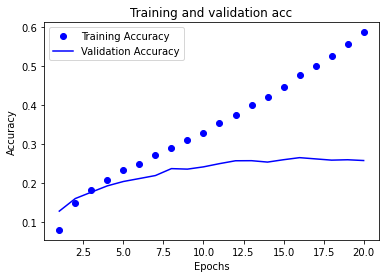

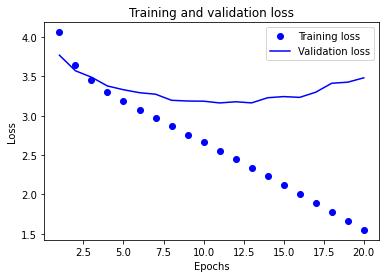

In [37]:
plot_train_val_acc(best_network_hist)
plot_train_val_loss(best_network_hist)

### Dropout Layers
After successfully determining the best tuning parameters and overfitting the network, the goal is now to maximize the model’s ability to generalize the results of the training data to classify unseen images. The addition of dropout layers can help boost validation accuracy and the ability of the model to generalize by "randomly setting (to 0) a number of output features of the layer during training" (Chollet, 2021). Eliminating a random set of values from the data has the effect of reducing the model's ability to train precisely for that particular data, in theory improving the model's ability to generalize and correctly identify new data. 
 
However in this case the addition of dropout layers did not have any improvement in the model's ability to correctly predict the validation data. The plot comparing the model with added dropout layers and the original model without any dropout layers shows that the addition of the dropout layers have the effect of reducing the validation accuracy and increasing validation loss.



In [21]:

def build_network_w_dropout(units_list, learning_rate=0.0001, epochs=12, dropout_rate=0.3):
    network = models.Sequential()
    
    #first layer - needs input_shape
    network.add(layers.Dense(units_list[0], activation='relu', input_shape=(32 * 32 * 3, )))
    network.add(layers.Dropout(dropout_rate))
    
    #middle layers
    for units in units_list[1:]:
        network.add(layers.Dense(units, activation='relu'))
        network.add(layers.Dropout(dropout_rate))
    
    #last layer
    network.add(layers.Dense(100, activation='softmax'))
    
    
    network.compile(optimizer=keras.optimizers.Adam(learning_rate),
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

    csv_logger = CSVLogger('log.csv', append=True, separator=',')
    history = network.fit(
        train_images_flat, train_labels, 
        epochs=epochs, 
        verbose=0,
        callbacks=[csv_logger],
        validation_split=0.2
    )

    return history

In [22]:
best_network_w_drop_hist = build_network_w_dropout(best_params_val[0], best_params_val[1], 12)

Compare without dropout

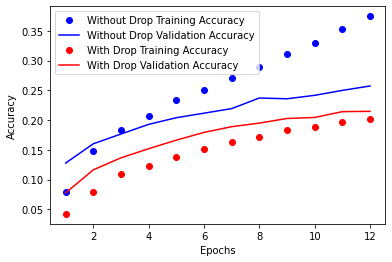

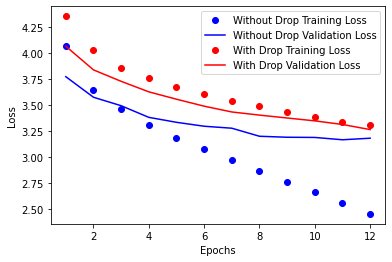

In [45]:
compare_acc(best_network_hist,best_network_w_drop_hist, 'Without Drop', 'With Drop')
compare_loss(best_network_hist,best_network_w_drop_hist, 'Without Drop', 'With Drop')

#### Further Tuning
The grid search found a 3 layer network to be the best classifier model. It is worth investigating whether the addition of a 4th dense layer could further improve the model as this option was not included in the grid search. 
The results show that there is no noticeable improvement to validation accuracy or loss with the addition of the fourth layer. 
 
Also worth exploring is a lower learning rate. The hyperparameter search found that the lowest option for learning rate was the best so it is worthwhile exploring an even lower learning rate. Once again the model did not show any noticeable improvements when trained with a learning rate of 0.0001. The selection of batch size was also explored but keras documentation states that batchsize should not be specified if the "data is in the form of datasets...since they generate batches" ([Keras Documentation Link](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

#### 4 Layer Network

In [24]:
best_network_4_layers_hist = build_network_adam_opt([1024,1024,1024,1024], best_params_val[1], epochs=12)

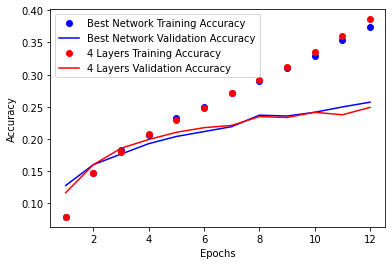

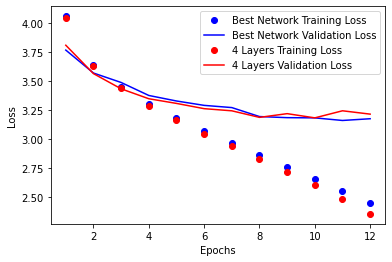

In [46]:
compare_acc(best_network_hist,best_network_4_layers_hist, 'Best Network', '4 Layers')
compare_loss(best_network_hist,best_network_4_layers_hist, 'Best Network', '4 Layers')

#### Lower Learing Rate

In [26]:
best_network_lower_lr_hist = build_network_adam_opt([1024,1024,1024], 0.00001, epochs=12)

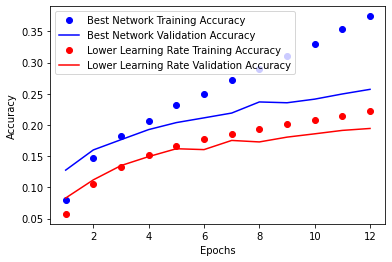

In [47]:
compare_acc(best_network_hist,best_network_lower_lr_hist, 'Best Network', 'Lower Learning Rate')

In [28]:

def build_network_w_batchsize(units_list, learning_rate=0.0001, epochs=5, log_name='log', batch_size=128):
    network = models.Sequential()
    
    #first layer - needs input_shape
    network.add(layers.Dense(units_list[0], activation='relu', input_shape=(32 * 32 * 3, )))
    
    #middle layers
    for units in units_list[1:]:
        network.add(layers.Dense(units, activation='relu'))
    
    #last layer
    network.add(layers.Dense(100, activation='softmax'))
    
    
    network.compile(optimizer=keras.optimizers.Adam(learning_rate),
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    log_name = log_name + '.csv'
    csv_logger = CSVLogger(log_name, append=False, separator=',')
    history = network.fit(
        train_images_flat, train_labels, 
        epochs=epochs, 
        verbose=0,
        callbacks=[csv_logger],
        validation_split=0.2,
        batch_size=batch_size
    )

    return history

#### Specified Batch Size

In [29]:
best_network_batch_128_hist = build_network_w_batchsize(best_params_val[0], best_params_val[1], 12, batch_size=128)

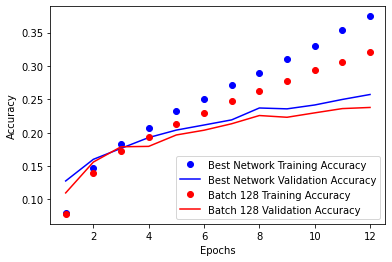

In [48]:
compare_acc(best_network_hist,best_network_batch_128_hist, 'Best Network', 'Batch 128')

In [31]:
best_network_batch_16_hist = build_network_w_batchsize(best_params_val[0], best_params_val[1], 12, batch_size=16)

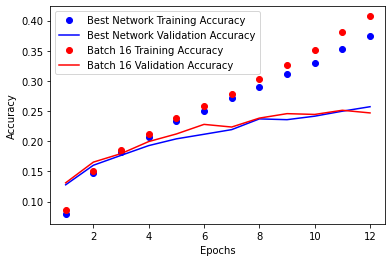

In [49]:
compare_acc(best_network_hist,best_network_batch_16_hist, 'Best Network', 'Batch 16')

## Model Evaluation
The final model will have a total of four dense layers. Three of those being 1024 units with relu activation and a final 100 unit softmax activation layer. The optimizer function will be Adam with a learning rate of 0.001. The loss function will remain categorical cross entropy. The success metric will be the accuracy percentage of the classification and the model will be trained for 12 epochs. The network will be trained using all 50,000 training samples. This now includes the sample images that were held out for validation purposes during tuning. The final network model will be tested on the remaining 10,000 test images to get the final model performance accuracy.

In [33]:
final_model = models.Sequential()
    
#first layer - needs input_shape
final_model.add(layers.Dense(1024, activation='relu', input_shape=(32 * 32 * 3, )))

#middle layers
final_model.add(layers.Dense(1024, activation='relu'))
final_model.add(layers.Dense(1024, activation='relu'))

#last layer
final_model.add(layers.Dense(100, activation='softmax'))


final_model.compile(optimizer=keras.optimizers.Adam(0.0001),
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

history = final_model.fit(
    train_images_flat, train_labels, 
    epochs=12, 
    verbose=2,
)

final_results = final_model.evaluate(test_images_flat, test_labels)


Epoch 1/12
1563/1563 - 4s - loss: 3.9898 - accuracy: 0.0921 - 4s/epoch - 3ms/step
Epoch 2/12
1563/1563 - 4s - loss: 3.5755 - accuracy: 0.1603 - 4s/epoch - 2ms/step
Epoch 3/12
1563/1563 - 4s - loss: 3.3855 - accuracy: 0.1929 - 4s/epoch - 2ms/step
Epoch 4/12
1563/1563 - 4s - loss: 3.2421 - accuracy: 0.2180 - 4s/epoch - 2ms/step
Epoch 5/12
1563/1563 - 4s - loss: 3.1217 - accuracy: 0.2423 - 4s/epoch - 2ms/step
Epoch 6/12
1563/1563 - 4s - loss: 3.0100 - accuracy: 0.2640 - 4s/epoch - 2ms/step
Epoch 7/12
1563/1563 - 4s - loss: 2.9022 - accuracy: 0.2827 - 4s/epoch - 2ms/step
Epoch 8/12
1563/1563 - 4s - loss: 2.8010 - accuracy: 0.3019 - 4s/epoch - 2ms/step
Epoch 9/12
1563/1563 - 4s - loss: 2.6972 - accuracy: 0.3243 - 4s/epoch - 2ms/step
Epoch 10/12
1563/1563 - 4s - loss: 2.5951 - accuracy: 0.3430 - 4s/epoch - 2ms/step
Epoch 11/12
1563/1563 - 4s - loss: 2.4860 - accuracy: 0.3650 - 4s/epoch - 2ms/step
Epoch 12/12
1563/1563 - 4s - loss: 2.3797 - accuracy: 0.3895 - 4s/epoch - 2ms/step
313/313 [====

In [ ]:
print(final_results)

[3.5501441955566406, 0.1981000006198883]


## Conclusion
The results from testing the model returned a 19.81% accuracy. The model was able to correctly predict almost one in five images correctly out of a possible 100 choices. While a 19% success rate may seem low, this is significantly higher than random chance which would be 1% for a 100 class classification problem. The final network accuracy of 19.81% is a 120% improvement upon the base model neural network accuracy of 8.9%. While overall accuracy is low, the limitation of layer types could be holding back performance. The inclusion of new layer types such as convnets could potentially improve classification accuracy. These layer types are generally quite successful applied to computer vision tasks such as image classification. 
 
The use of a grid search aided in identifying the best parameters. While not all parameters were examined due to computational limitations of such an operation, once the best hyperparameters were identified, edge cases such as an additional layer or lower learning rate were examined and found not to make any significant improvements to validation accuracy. Overall, the final tuned model was able to more than double the accuracy of the baseline neural network, improving from 8.9% to 19.81% accuracy, both of which are significantly more accurate than a 1% random chance guess.
